# <font color='blue'>Module 11 - CCPS 844 Data Mining</font>

[Reading XML files](#xml_ID)

[Styling a dataFrame](#style_ID)

[Plotting Univariate Distributions](#uniVariate_ID)

[Plotting Categorical Data](#cat_ID)

[Matrix Plots](#mat_ID)


# <a id="xml_ID">Reading XML files<a>
Extensible Markup Language (XML) is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. The W3C's XML 1.0 Specification and several other related specifications, all of them free open standards—define XML.

The design goals of XML emphasize simplicity, generality, and usability. It is a textual data format with strong support via Unicode for different human languages. Although the design of XML focuses on documents, the language is widely used for the representation of arbitrary data structures.

**Reading XML file and printing the read content**

In [1]:
import xml.etree.cElementTree as et
import pandas as pd
parsedXML = et.parse( "test.xml" )

et.dump(parsedXML)

<data>
    <customer name="Ali">
        <email>ali@gmail.com</email>
        <phone>047 321-1234</phone>
	        <income>23400344.567</income>
    </customer>
    <customer name="Kim">
        <email>kim@gmail.com</email>
	<income>54363744.678</income>
    </customer>    
    <customer name="Grace">
        <email>grace@gmail.com</email>
        <phone>047 555-4567</phone>
	   <income>56789117.456</income>
    </customer>  
    <customer name="Dave">
        <phone>047 555-6472</phone>
	<income>54363744.678</income>
        <address>
            <street>350 Victoria Street</street>
        </address>
    </customer>   

    <customer name="Roger">
        <email>roger@ryerson.ca</email>
        <phone>047 555-4567</phone>
	  <income>4132454.987</income>
    </customer>  
   
</data>


**To read all root elements from the file use: parsedXML.getroot(). This method returns root elements of this tree/XML file.**

**Each returned element is a node. The method node.attrib.get('name') will read element like << customer name="Dave">> and node.find('email') will look for any sub node named as email.**

In [2]:
for node in parsedXML.getroot():
    name = node.attrib.get('name')
    #name is an attribute of the node (which is text)
    email = node.find('email')#this is a node not text
    phone = node.find('phone')
    income = node.find('income')
    street = node.find('address/street')
    print(name,email,phone,income,street)

Ali <Element 'email' at 0x000002565E6BBCC0> <Element 'phone' at 0x000002565E6BBD10> <Element 'income' at 0x000002565E6BBD60> None
Kim <Element 'email' at 0x000002565E6BBE00> None <Element 'income' at 0x000002565E6BBE50> None
Grace <Element 'email' at 0x000002565E6BBEF0> <Element 'phone' at 0x000002565E6BBF40> <Element 'income' at 0x000002565E6BBF90> None
Dave None <Element 'phone' at 0x000002565E6C6090> <Element 'income' at 0x000002565E6C60E0> <Element 'street' at 0x000002565E6C6180>
Roger <Element 'email' at 0x000002565E6C6270> <Element 'phone' at 0x000002565E6C6310> <Element 'income' at 0x000002565E6C6360> None


**Defining a function that can read node values and handle the null/None cases.**

In [3]:
def getvalueofnode(node):
    """ input: a node, return: node text or None If the node is null"""
    return node.text if node is not None else None

**Defining a function which reads xml files and returs the read data as a dataframe**

In [4]:
def parseXMLtoDF(file):
    """ input: XML file name: a DataFrame prepared from that file """
    parsed_xml = et.parse(file)
    dfcols = ['name', 'email', 'phone', 'income','street']
    df_xml = pd.DataFrame(columns=dfcols)
 
    for node in parsed_xml.getroot():
        name = node.attrib.get('name')
        email = node.find('email')
        phone = node.find('phone')
        income = node.find('income')
        
        street = node.find('address/street')
 
        df_xml = df_xml.append(
            pd.Series([name, getvalueofnode(email), 
                       getvalueofnode(phone), getvalueofnode(income), 
                       getvalueofnode(street)], index=dfcols),
            ignore_index=True)
 
    return(df_xml)

**Calling the function parseXMLtoDF() defined above to read a XML file.**

In [5]:
df = parseXMLtoDF("test.xml")
df

C:\Users\cestaff\AppData\Local\Temp\ipykernel_18188\811599207.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xml = df_xml.append(
C:\Users\cestaff\AppData\Local\Temp\ipykernel_18188\811599207.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xml = df_xml.append(
C:\Users\cestaff\AppData\Local\Temp\ipykernel_18188\811599207.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xml = df_xml.append(
C:\Users\cestaff\AppData\Local\Temp\ipykernel_18188\811599207.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xml = df_xml.append(
C:\Users\cestaff\AppData\Local\Temp\ipykernel_18188\811599207.py:15: FutureWarning: The 

,name,email,phone,income,street
0,Ali,ali@gmail.com,047 321-1234,23400344.567,None
1,Kim,kim@gmail.com,None,54363744.678,None
2,Grace,grace@gmail.com,047 555-4567,56789117.456,None
3,Dave,None,047 555-6472,54363744.678,350 Victoria Street
4,Roger,roger@ryerson.ca,047 555-4567,4132454.987,None


**Check the data type of the income column**

In [6]:
df.dtypes

name      object
email     object
phone     object
income    object
street    object
dtype: object

**Make the column income a numric column**

In [7]:
df.income = pd.to_numeric(df.income)

**We can note that the column is displayed in scientific notation. Formatting Dataframe cells to display large numbers**

In [8]:
df

,name,email,phone,income,street
0,Ali,ali@gmail.com,047 321-1234,2.340034e+07,None
1,Kim,kim@gmail.com,None,5.436374e+07,None
2,Grace,grace@gmail.com,047 555-4567,5.678912e+07,None
3,Dave,None,047 555-6472,5.436374e+07,350 Victoria Street
4,Roger,roger@ryerson.ca,047 555-4567,4.132455e+06,None


# <a id="style_ID">Styling a dataFrame</a>


You can apply conditional formatting, the visual styling of a DataFrame depending on the data within, by using the DataFrame.style property. This is a property that returns a Styler object, which has useful methods for formatting and displaying DataFrames.

You can read further on the subject at https://pandas.pydata.org/pandas-docs/stable/style.html

**Round the numric values to two decimal places in python pandas**

In [9]:
pd.options.display.float_format = '{:.2f}'.format

**We can note that the numeric column values getting displayed in the following are rounded of to two decimal places.**

In [10]:
df

,name,email,phone,income,street
0,Ali,ali@gmail.com,047 321-1234,23400344.57,None
1,Kim,kim@gmail.com,None,54363744.68,None
2,Grace,grace@gmail.com,047 555-4567,56789117.46,None
3,Dave,None,047 555-6472,54363744.68,350 Victoria Street
4,Roger,roger@ryerson.ca,047 555-4567,4132454.99,None


**One might be interested in seeing hundreds, thousands and millions separated with commas. Setting the DataFrame display format to acheive this.**

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

**Display the DataFrame**

In [12]:
df

,name,email,phone,income,street
0,Ali,ali@gmail.com,047 321-1234,"23,400,344.57",None
1,Kim,kim@gmail.com,None,"54,363,744.68",None
2,Grace,grace@gmail.com,047 555-4567,"56,789,117.46",None
3,Dave,None,047 555-6472,"54,363,744.68",350 Victoria Street
4,Roger,roger@ryerson.ca,047 555-4567,"4,132,454.99",None


# <a id="uniVariate_ID">Plotting Univariate Distributions<a>

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).
You can explore it further at: 

https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions


KDE : In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. https://en.wikipedia.org/wiki/Kernel_density_estimation

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Let's generate some data and draw a distribution plot.**

C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


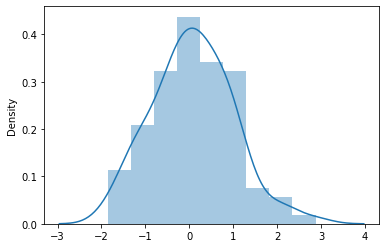

In [14]:
#Setting the seed to regenerate the same visualisation
np.random.seed(1427)
x = np.random.normal(size=100)
sns.distplot(x);

## Histograms
Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

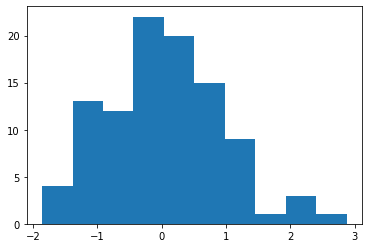

In [15]:
plt.hist(x)
plt.show()

To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


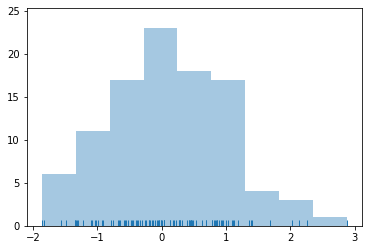

In [16]:
sns.distplot(x, kde=False, rug=True);


** <font color='red'> This histogram has a differnt shape than the one plotted with plt.hist(x) because of the number of bins. We adjust bins in the following example.</font>**

When drawing histograms, the main choice you have is the number of bins to use and where to place them. distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


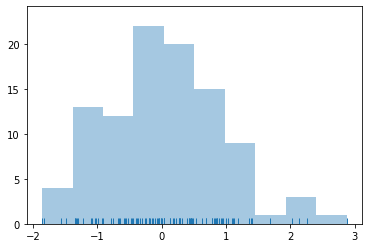

In [17]:
sns.distplot(x, bins=10, kde=False, rug=True);

### Kernel density estimation
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


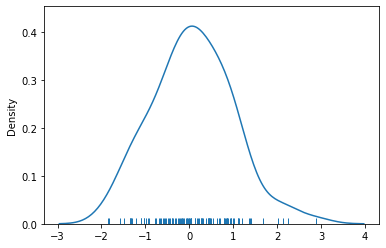

In [18]:
sns.distplot(x, hist=False, rug=True);

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. **By default, it also draws the univariate distribution of each variable on the diagonal Axes:**

**Let's load the iris dataset and plot it's pairplot**

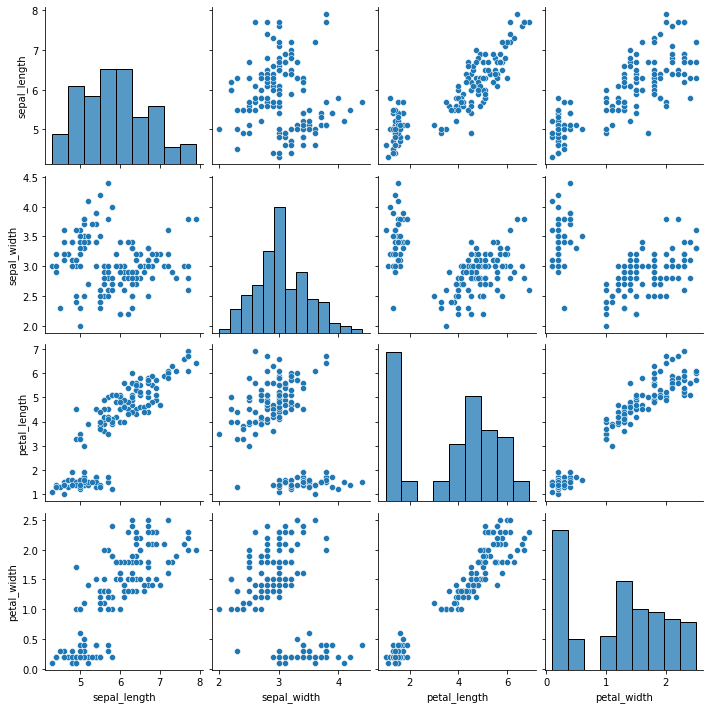

In [19]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

# <a id="cat_ID">Plotting Categorical Data<a>

The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:


You can read further about the topic at : https://seaborn.pydata.org/tutorial/categorical.html

**Importing the tips dataset from the seaborn library**

In [20]:
tips = sns.load_dataset("tips");

In [21]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [22]:
tips.describe()

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**strip plot stripplot() for Categorical scatterplots : ** The stripplot is used to visualise the values of quantitative variables across the levels.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

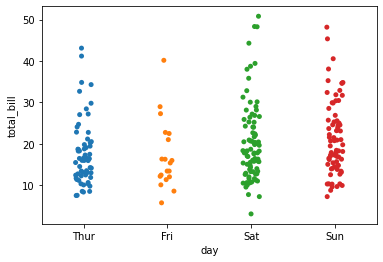

In [24]:
sns.stripplot(x="day", y="total_bill", data=tips)

**In stripplot the overlapping points make it difficult to understand the distribution of the data. The parameter 'jitter' can be used to resolve the problem. **

<AxesSubplot:xlabel='day', ylabel='total_bill'>

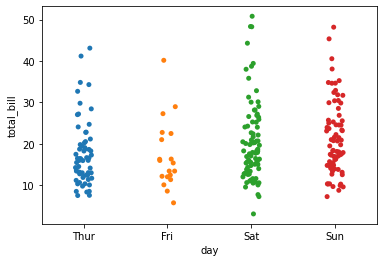

In [25]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

**swarmplot is even a better solution which makes understanding the distribution of data more simpler**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

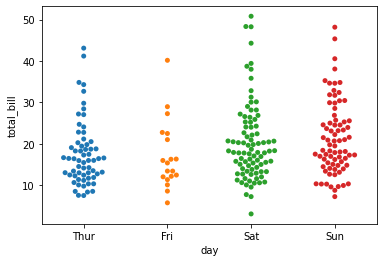

In [26]:
sns.swarmplot(x="day", y="total_bill", data=tips)

**The hue parameter can be helpful to visualise the sub categories. Each sub category plotted in a diferent color.**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

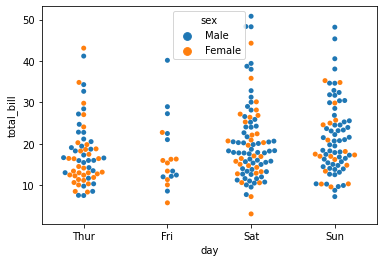

In [27]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\cestaff\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='tip'>

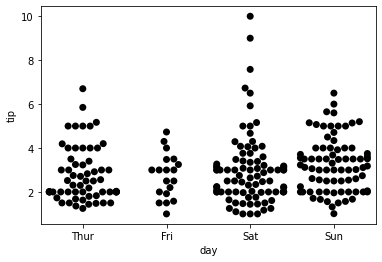

In [28]:
sns.swarmplot(y="tip", x="day", data=tips,color='black',size=7)
#color controls the color
#size of dots

<AxesSubplot:xlabel='day', ylabel='total_bill'>

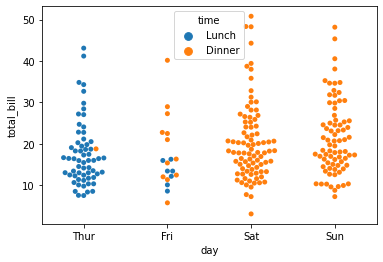

In [29]:
sns.swarmplot(x="day", y="total_bill", hue="time", data=tips)

**Boxplots for understanding the tips dataset**

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

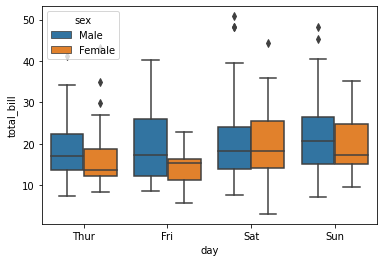

In [30]:
sns.boxplot(data=tips, x="day", y="total_bill", hue ="sex");

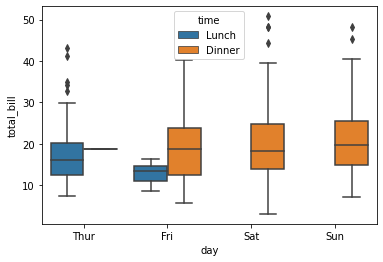

In [31]:
sns.boxplot(data=tips, x="day", y="total_bill", hue ="time");

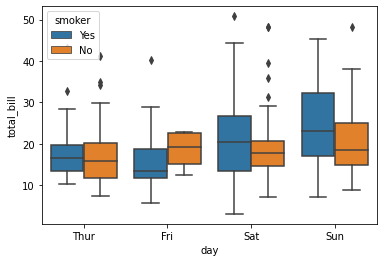

In [32]:
sns.boxplot(data=tips, x="day", y="total_bill", hue ="smoker");

**violinplot() an alternative for boxplots**

The violinplot() combines a boxplot with the kernel density estimation procedure described above for plots.

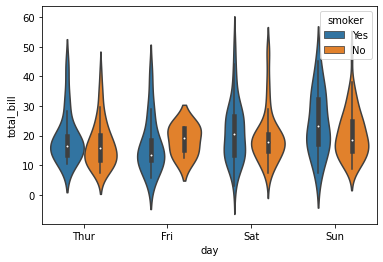

In [33]:
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker");

It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

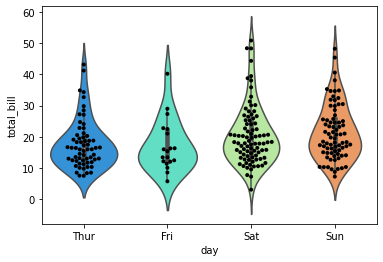

In [34]:
sns.violinplot(data=tips, x="day", y="total_bill",
               palette='rainbow')#
sns.swarmplot(data=tips, x="day", y="total_bill",
              color = 'black',size=4)#size=4 size of dots

<AxesSubplot:xlabel='tip', ylabel='day'>

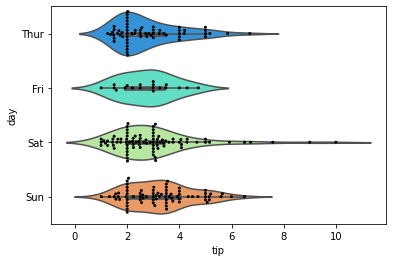

In [35]:
sns.violinplot(x="tip", y="day", data=tips,
               palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,
              color='black',size=3)

## Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the **barplot()** function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

**Let's load the titanic dataset**

In [36]:
titanic = sns.load_dataset("titanic")

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


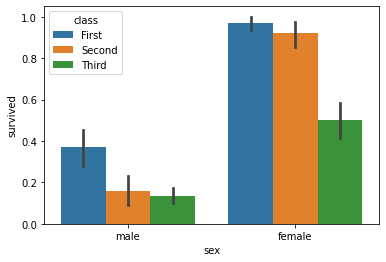

In [40]:
sns.barplot(x="sex", y="survived", 
            hue="class", data=titanic);

## Count plots
A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function.

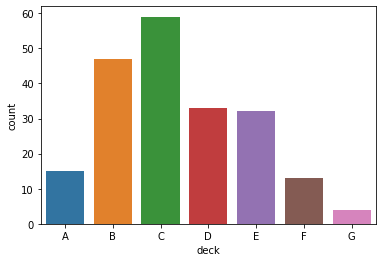

In [41]:
sns.countplot(x="deck",data=titanic);
#sns.countplot(x="deck", palette="Blues_d",data=titanic);

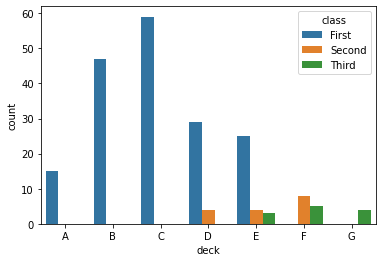

In [42]:
sns.countplot(x="deck",data=titanic,hue="class");

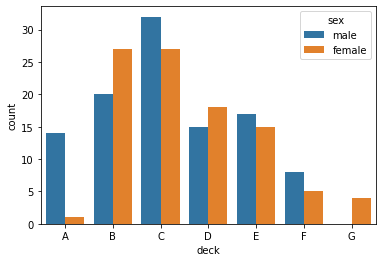

In [43]:
sns.countplot(x="deck",data=titanic,hue="sex");

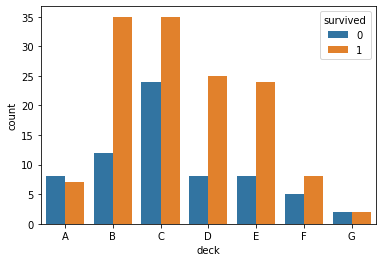

In [44]:
sns.countplot(x="deck",data=titanic,hue="survived");

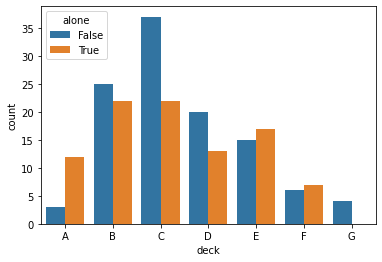

In [45]:
sns.countplot(x="deck",data=titanic,hue="alone");

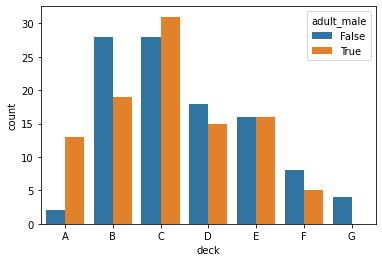

In [46]:
sns.countplot(x="deck",data=titanic,hue="adult_male");

 # <a id="mat_ID">Matrix Plots<a>

Matrix plots allow you to plot:
* **heatmap()** - Data as color-encoded matrices where the color and its intensity describes the correlation between two features. 
* **clustermap()** Describes the correlation with color encodings and dendrogram.

## Heatmap
Before applying the heatmap, the data should be in a matrix form. The sns.heatmap function basically just colors the matrix for you. 
More examples can be consulted at: 
https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [47]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.00,-0.34,-0.08,-0.04,0.08,0.26,-0.56,-0.20
pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55,0.09,0.14
age,-0.08,-0.37,1.00,-0.31,-0.19,0.10,0.28,0.20
sibsp,-0.04,0.08,-0.31,1.00,0.41,0.16,-0.25,-0.58
parch,0.08,0.02,-0.19,0.41,1.00,0.22,-0.35,-0.58
fare,0.26,-0.55,0.10,0.16,0.22,1.00,-0.18,-0.27
adult_male,-0.56,0.09,0.28,-0.25,-0.35,-0.18,1.00,0.40
alone,-0.20,0.14,0.20,-0.58,-0.58,-0.27,0.40,1.00


<AxesSubplot:>

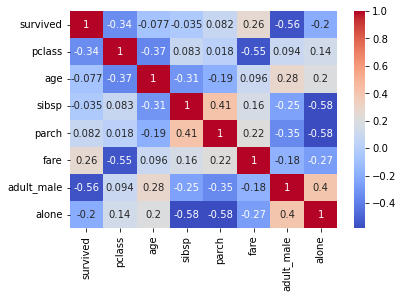

In [48]:
sns.heatmap(titanic.corr(),cmap='coolwarm',annot=True)

In [49]:
tips.corr()

,total_bill,tip,size
total_bill,1.00,0.68,0.60
tip,0.68,1.00,0.49
size,0.60,0.49,1.00


<AxesSubplot:>

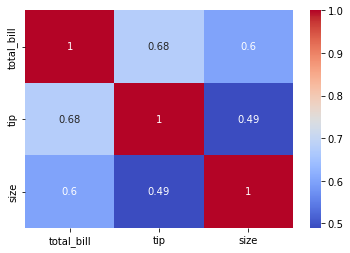

In [50]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

## clustermap

The clustermap plots a matrix dataset as a hierarchically-clustered heatmap. You can explore it further on: https://seaborn.pydata.org/generated/seaborn.clustermap.html

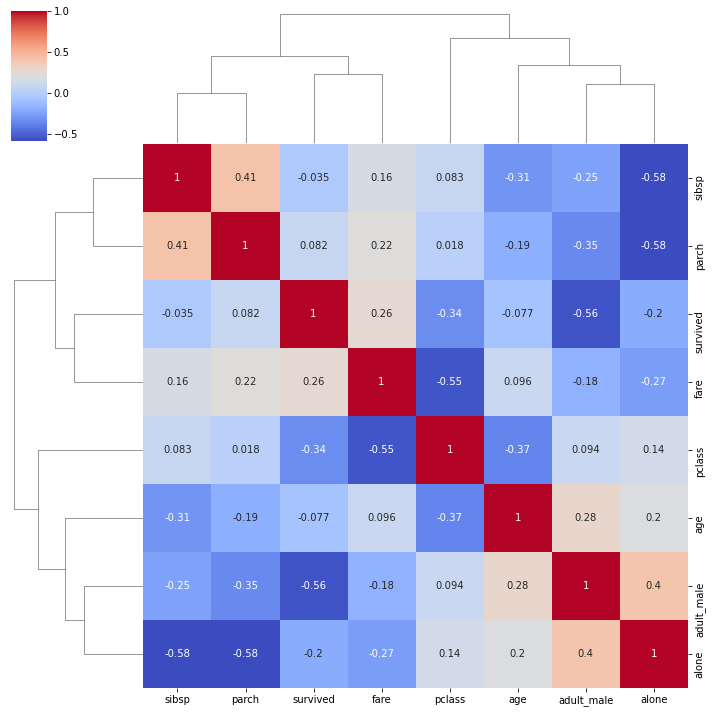

In [51]:
sns.clustermap(titanic.corr(),cmap='coolwarm',annot=True)

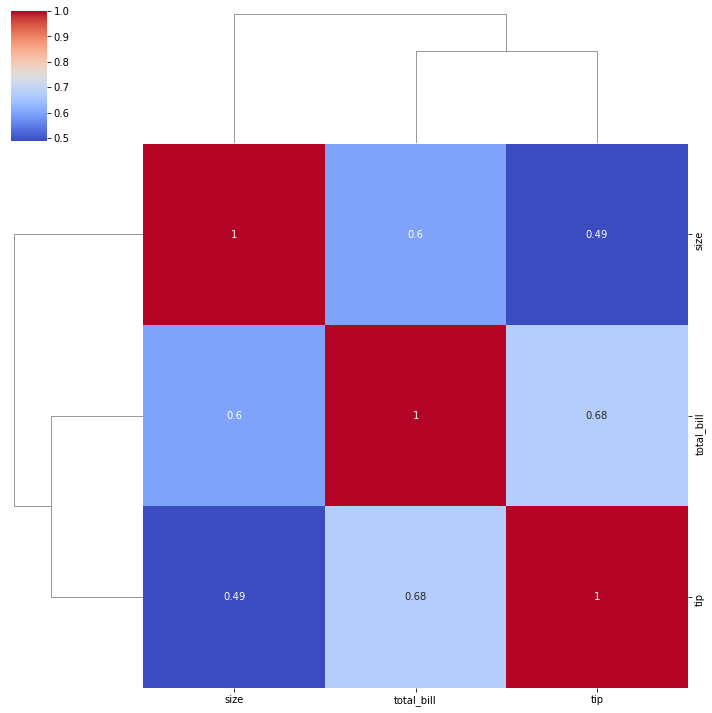

In [52]:
sns.clustermap(tips.corr(),cmap='coolwarm',annot=True)